In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Geodesics as gd
import Model as md
import cmath as cmt
import glob


In [2]:
p = 5; q = 4; nlayers = 3
nDecorr = 1
nMeasurements = 5
saveFreq = 10000

In [ ]:

model = md.FractonModel(p,q,nlayers)
nBorder = len(model.border)
corr = np.zeros((saveFreq,int(len(model.border)/2)))
accum_spins = np.zeros((saveFreq,len(model.lattice)))

saveCounter = 0
for iteration in range(nMeasurements):
    for decorr in range(nDecorr):
        geod = np.random.choice(model.geodesicList)
        inner = np.random.randint(2)*2-1
        model.spins = model.spins*inner*geod.vect_inside()(model.centers)
    accum_spins[saveCounter,:] = model.spins
    corr[saveCounter,:] = model.getBorderCorrelations()/(nBorder)
    fig, ax = model.quick_plot(unitcircle=True, colors = 'spins')
    fig.savefig("/home/alejo/Desktop/GSExample"+str(iteration)+".png", format = 'png', transparent=True)
    saveCounter += 1
    if(saveCounter == saveFreq):
        np.save("./States"+str(int(iteration/saveFreq))+".npy",np.array(accum_spins))
        np.save("./Correlations"+str(int(iteration/saveFreq))+".npy",corr)
        corr = np.zeros((saveFreq,int(len(model.border)/2)))
        accum_spins = np.zeros((saveFreq,len(model.lattice)))
        saveCounter = 0


In [ ]:
corr_list = sorted(glob.glob("../Data/Correlations?.npy"))
corr_list += sorted(glob.glob("../Data/Correlations??.npy"))

states_list =sorted(glob.glob("../Data/States?.npy"))
states_list +=sorted(glob.glob("../Data/States??.npy"))
distances = np.linspace(1,280,280)

In [ ]:



corrs = np.zeros((nMeasurements,280))
for num,file in enumerate(corr_list):
    corr = np.load(file)
    corrs[10000*num:10000*(num+1),:] = corr
meanCorrelation = np.mean(corrs,axis = 0)
meanAbsCorrelation = np.mean(np.abs(corrs),axis = 0)
absMeanCorrelation = np.abs(meanCorrelation)
dmax = 150
plt.plot(distances[:dmax],meanCorrelation[:dmax],label = 'Mean')
#plt.plot(distances[:dmax],meanAbsCorrelation[:dmax], label = 'Mean Abs')
plt.plot(distances[:dmax],absMeanCorrelation[:dmax], label = 'Abs Mean')
plt.legend()

In [ ]:
allCorrelations = np.zeros((560,280))

for num, file in enumerate(states_list):
    states = np.load(file)
    print(num)
    for idx,state in enumerate(states):
        model.spins = state
        allCorrelations[:,:] += model.getBorderCorrelationsEachSpin()

In [19]:
allCorrelations = np.load("../Data/MeansTest.npy")
allCorrelations = allCorrelations/1000000
distances = np.linspace(1,280,280)

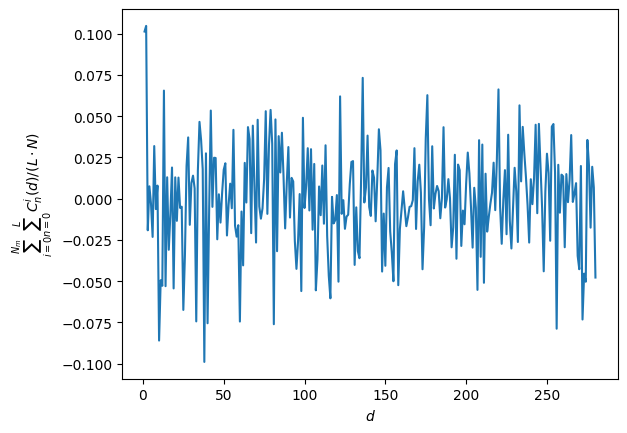

In [27]:
fig, ax = plt.subplots()
ax.plot(distances, np.sum(allCorrelations,axis = 0))
ax.set_ylabel(r'$\sum_{i=0}^{N_m}\sum_{n=0}^L C^i_n(d)/(L\cdot N)$')
ax.set_xlabel(r'$d$')
fig.savefig("/home/alejo/Desktop/BorderCorrelations.png", format = 'png',  pad_inches = 1,bbox_inches= 'tight',transparent=True)